In [1]:
import scipy as sp
from scipy import integrate
import numpy as np
import pylab
from pylab import rcParams
from IPython.display import clear_output
import seaborn as sns
import logging
from datetime import datetime
import os

In [2]:
rcParams['figure.figsize'] = 10, 10

In [3]:
def G(u, v, a, b):
    return a - (b + 1) * u +u*u*v

def H(u, v, a, b):
    return b * u - u * u * v


In [4]:
def Brusselator_reshape(y, t, a, b, Du, Dv, dx, dy, dim):
    y_buf = y.reshape((2,dim,dim))
    u = y_buf[0]
    v = y_buf[1]

    dydt = np.zeros_like(y)
    dydt_buf = dydt.reshape((2,dim,dim))
    
    dudt = dydt_buf[0]
    dudt += G(u,v,a,b)
    dvdt = dydt_buf[1]
    dvdt += H(u,v,a,b)

    #---------------------------------------------------------------------------

    dudt[:,1:-1] += Du * np.diff(u,2,axis = 1)  / dx**2
    dudt[1:-1,:] += Du * np.diff(u,2,axis = 0)  / dy**2

    dudt[0,:]  += Du * (-2.0*u[0,:] + 2.0*u[1,:]) / dy**2 
    dudt[-1,:]  += Du * (-2.0*u[-1,:] + 2.0*u[-2,:]) / dy**2 

    dudt[:,0]  += Du * (-2.0*u[:,0] + 2.0*u[:,1]) / dx**2 
    dudt[:,-1]  += Du * (-2.0*u[:,-1] + 2.0*u[:,-2]) / dx**2 

    #---------------------------------------------------------------------------

    dvdt[:,1:-1] += Dv * np.diff(v,2,axis = 1)  / dx**2
    dvdt[1:-1,:] += Dv * np.diff(v,2,axis = 0)  / dy**2

    dvdt[0,:]  += Dv * (-2.0*v[0,:] + 2.0*v[1,:]) / dy**2 
    dvdt[-1,:]  += Dv * (-2.0*v[-1,:] + 2.0*v[-2,:]) / dy**2 

    dvdt[:,0]  += Dv * (-2.0*v[:,0] + 2.0*v[:,1]) / dx**2 
    dvdt[:,-1]  += Dv * (-2.0*v[:,-1] + 2.0*v[:,-2]) / dx**2 
    return dydt

In [5]:
def Run(params_system, params_numerical, out_folder_name = None, display_res = True):
    a,b,Du,Dv = params_system.values()
    points_count,dx,dy,dt,t_calc_batch,iters = params_numerical.values()
    
    x_right_border = int(points_count*dx)
    xs = np.linspace(0,x_right_border,points_count)

    y_right_border = int(points_count*dy)
    ys = np.linspace(0,y_right_border,points_count)
    
    t = np.arange(0, t_calc_batch, dt)
    
    y0 = np.random.randn(points_count ** 2 * 2)*0.2
    y0[:points_count ** 2] += a
    y0[points_count ** 2:] += b/a
    
    if not out_folder_name:
        out_folder_name = (str(params_system).replace(':','=')+' '+str(params_numerical).replace(':','=')+' '+str(datetime.now()).replace(':','_'))
    os.makedirs(out_folder_name)
    logging.basicConfig(filename=os.path.join(out_folder_name,"log"), level=logging.INFO, format='%(asctime)s %(message)s')
    logger = logging.getLogger('memes')
    logger.info(str(params_system))
    logger.info(str(params_numerical))
    
    res = [y0]
    for i in range(iters):
        logger.info("start iter "+str(i))
        
        res, info = sp.integrate.odeint(Brusselator_reshape, res[-1], t, args=(a, b, Du, Dv, dx, dy, points_count), ml=2, mu=2, full_output=True)
        
        logger.info("end iter "+str(i))
        logger.info(str(info))
        
        last = res[-1].reshape((2,points_count,points_count))
        
        clear_output(True)
        print(dx,dy)
        ax = sns.heatmap(last[0])
        
        ticks = np.linspace(0,points_count,5,dtype=np.int)
        pylab.xticks(ticks)
        ax.set_xticklabels([int(i*dx) for i in ticks])
        
        #ticks = np.linspace(0,points_count,5)
        pylab.yticks(ticks)
        ax.set_yticklabels([int(i*dy) for i in ticks])
                      
        pylab.savefig(os.path.join(out_folder_name,str(i)+' '+str(datetime.now()).replace(':','_'))+' t = '+str((i+1)*t_calc_batch)+'.png')
       
        if display_res:
            pylab.show()
            
        if('error' in info['message']):
            logging.error(info['message'])
    logger.info('Success!')

0.15 0.15


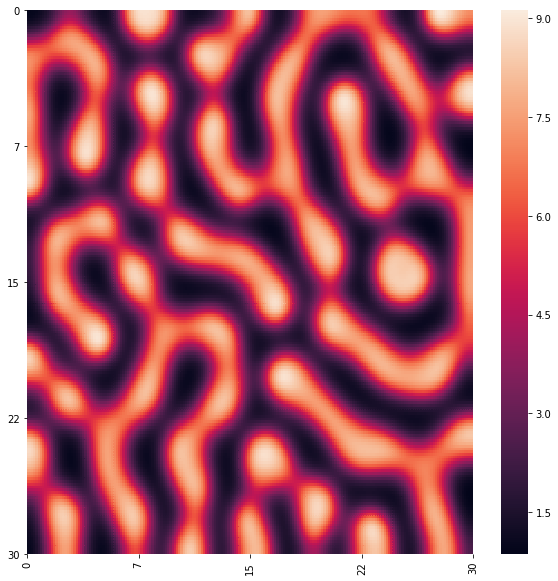

In [ ]:
params_system = {'a':4.5,'b':((1 + 1.59099)**2)*(1+.3),'Du':1,'Dv':8}
params_numerical = {'points_count':200,'dx':0.15,'dy':0.15,'dt':0.0125,'t_calc_batch':0.5,'iters':100}
Run(params_system, params_numerical)

In [0]:
points_count = 200
t = np.linspace(0, 0.5, 40)
a,b,Du,Dv = (4.5,((1 + 1.59099)**2)*(1+.3),1,8)
dx = 0.15
dy = 0.15
x_right_border = int(points_count*dx)
xs = np.linspace(0,x_right_border,points_count)

y_right_border = int(points_count*dy)
ys = np.linspace(0,y_right_border,points_count)

t_step = t[1]-t[0]

y0 = np.random.randn(points_count ** 2 * 2)*0.2
y0[:points_count ** 2] += a
y0[points_count ** 2:] += b/a
y0.shape

(80000,)

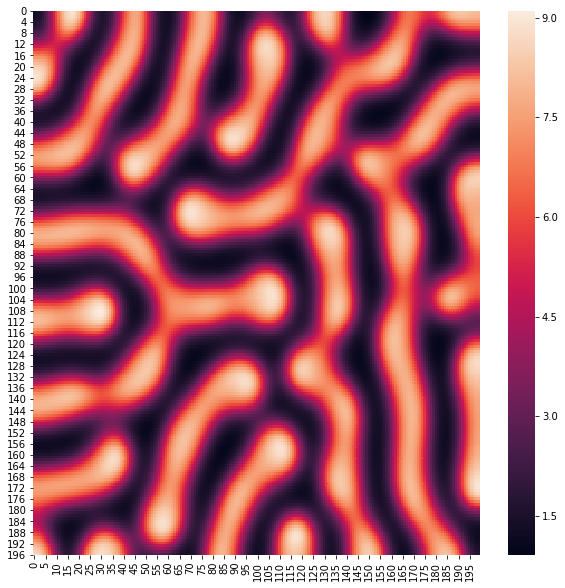

35 -1.6128605484055925e-05 0:00:00.821147


KeyboardInterrupt: ignored

In [0]:
from datetime import datetime
y0 = np.random.randn(points_count ** 2 * 2)*0.2
y0[:points_count ** 2] += a
y0[points_count ** 2:] += b/a
fst = True
clear_output(True)
last = y0.reshape((2,points_count,points_count))
sns.heatmap(last[0], center=0)
pylab.show()
prev_mean = y0.mean()
for i in range(5000):
  if fst:
    fst = False
    res, info = sp.integrate.odeint(Brusselator_reshape, y0, t, args=(a, b, Du, Dv, dx, dy, points_count), ml=2, mu=2, full_output=True)
  else:
    res, info = sp.integrate.odeint(Brusselator_reshape, res[-1], t, args=(a, b, Du, Dv, dx, dy, points_count), ml=2, mu=2, full_output=True)
  strt = datetime.now()
  last = res[-1].reshape((2,points_count,points_count))
  clear_output(True)
  sns.heatmap(last[0])
  pylab.show()
  cur_mean = res[-1].mean()
  print(str(i),str(prev_mean-cur_mean),datetime.now()-strt)
  prev_mean = cur_mean
  if('error' in info['message']):
    raise Exception(info['message'])

In [0]:
res = sp.integrate.odeint(Brusselator_reshape, res[-1], t, args=(p, q, Du, Dv, dx, dy, points_count), ml=2, mu=2)

In [0]:
last = res[-1].reshape((2,points_count,points_count))

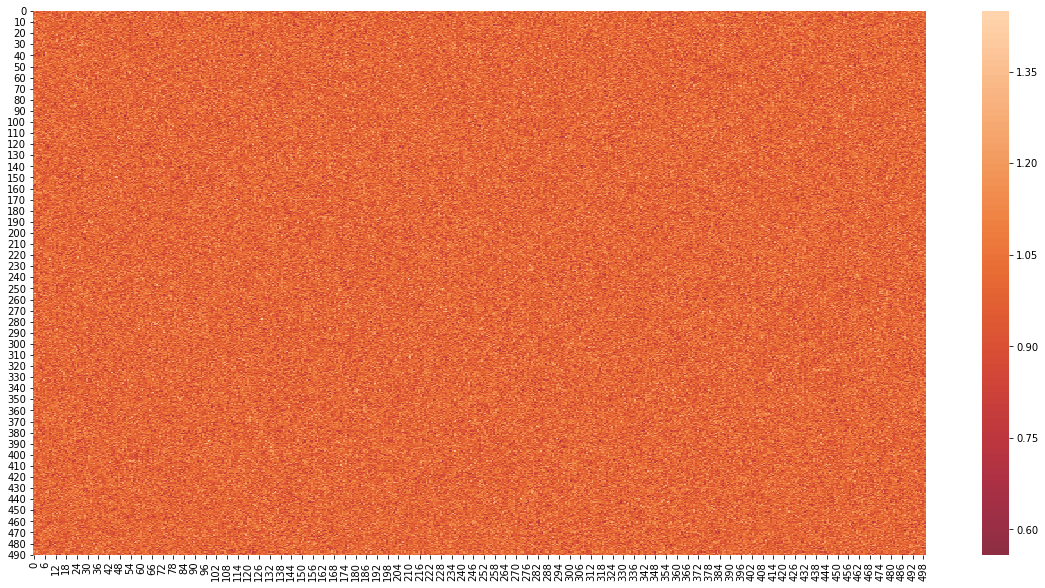

In [0]:
import seaborn as sns
ax = sns.heatmap(last[0], center=0)


In [0]:
b = a.reshape((2,2,3))

In [0]:
b[0]*b[1]

array([[ 0, 11, 24],
       [39, 56, 75]])

In [0]:
y = np.array([1,2,3,4,5,6,7,8])
dim = 2
dydt = np.empty_like(y)
dydt_buf = dydt.reshape((2,dim,dim))
# Just like u and v are views of the interleaved vectors
# in y, dudt and dvdt are views of the interleaved output
# vectors in dydt.
dudt = dydt_buf[0]
dudt[0][0]=229
dydt

array([                229, 4636033603912859648, 4652433039743464244,
       4636033603912859648, 4640537203540230144, 4648784420357852365,
       4652433039743464244, 4648784420357852365])

In [0]:
y = np.array([1,2,3,4,5,6,7,8])
dim = 2
dydt = np.empty_like(y)
dydt_buf = dydt.reshape((2,dim,dim))
dudt = dydt_buf[0]
dvdt = dydt_buf[1]
dudt[0][0]=229
dydt

array([                229, 4599075939470750516, 4603579539098121012,
       4606281698874543310, 4608083138725491508, 4609434218613702657,
       4610785298501913806, 4611911198408756430])